<a href="https://colab.research.google.com/github/sandhyajnv/Deep-Learning-/blob/main/DL_Assignment2_classification_1layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def data_extract(path):
  my_file = open(path, "r")
  data = my_file.read()
  data_into_list = data.split("\n")
  #data_into_list=data_into_list[1:]
  new=[]

  for i in range(len(data_into_list[:-1])):
    a=data_into_list[i]
    a=a.split(" ")
    a=a[:2]
    a=np.array(a)
    a=np.float_(a)
    a=list(a)
    new.append(a)

  data=np.array(new)
  return(data)


In [ ]:

path="/content/drive/MyDrive/Class1.txt"
data_class1=data_extract(path)

In [ ]:
data_class2=data_extract("/content/drive/MyDrive/Class2.txt")
data_class3=data_extract("/content/drive/MyDrive/Class3.txt")

In [ ]:
print(data_class1.shape,data_class2.shape,data_class3.shape)

(500, 2) (500, 2) (500, 2)


In [ ]:
# data_class1=data[:500]
# data_class2=data[500:1000]
# data_class3=data[1000:1700]

In [ ]:
data_class1_train=data_class1[:300].T
data_class1_validation=data_class1[300:400].T

data_class1_test=data_class1[400:].T

In [ ]:
data_class2_train=data_class2[:300].T
data_class2_validation=data_class2[300:400].T
data_class2_test=data_class2[400:].T

In [ ]:
data_class3_train=data_class3[:300].T
data_class3_validation=data_class3[300:400].T
data_class3_test=data_class3[400:].T

In [ ]:
print(data_class3_validation.shape)

(2, 100)


In [ ]:
data_train=np.concatenate((data_class1_train,data_class2_train,data_class3_train),axis=1)

In [ ]:
data_validation=np.concatenate((data_class1_validation,data_class2_validation,data_class3_validation),axis=1)

In [ ]:
print(data_validation.shape)

(2, 300)


In [ ]:
# 300,300,300
gt1=np.int_(np.ones((1,300)))
gt2=np.int_(2*np.ones((1,300)))
gt3=np.int_(3*np.ones((1,300)))
gt=np.concatenate((gt1,gt2,gt3),axis=1)

print(gt.shape)


(1, 900)


In [ ]:
# 100,100,100
gt1_v=np.int_(np.ones((1,100)))
gt2_v=np.int_(2*np.ones((1,100)))
gt3_v=np.int_(3*np.ones((1,100)))
gt_v=np.concatenate((gt1_v,gt2_v,gt3_v),axis=1)
print(gt_v.shape)

(1, 300)


In [ ]:
data_train=np.concatenate((gt,data_train),axis=0)

In [ ]:
print(data_train[0,1])

1.0


In [ ]:
def initial_para(n_neuron):
  
  n_input=2
  n_output=3
  W1=np.random.rand(n_neuron,n_input)-0.5
  b1=np.random.rand(n_neuron,1)-0.5
  W2=np.random.rand(n_output,n_neuron)-0.5
  b2=np.random.rand(n_output,1)-0.5
  return(W1,W2,b1,b2)

In [ ]:
def sigmoid(v):
  return(1/(1+np.exp(-v)))

In [ ]:
# def forward_pass(x):
#   W1,W2,b1,b2=initial_para()
#   p1=np.dot(W1,x)+b1
#   A1=sigmoid(p1)
#   p2=np.dot(W2,A1)+b2
#   A2=sigmoid(p2)
#   return(p1,A1,p2,A2)


In [ ]:
# def instantaneous_error(error):
#   return(0.5*np.sum((error**2)))
 
def inst_error(e):
    return sum(0.5*(e)**2)

In [ ]:
data_train[0,300]

2.0

In [ ]:
def train_sgd(data_train,nodes):
  W1,W2,b1,b2=initial_para(nodes)
  #print(W1.shape,W2.shape,b1.shape,b2.shape)
  iter=1000
  eta=0.1
  Error=[]
  epoch=[]
  y1=[1,0,0]
  y2=[0,1,0]
  y3=[0,0,1]
  y1=np.array(y1)
  y1=y1.T
  y2=np.array(y2)
  y2=y2.T
  y3=np.array(y3)
  y3=y3.T
  for i in range(iter):
    E=[]
    for j in range(data_train.shape[1]):
      x=data_train[1:,j].reshape(2,1)

      
      p1=np.matmul(W1,x)+b1
      #print(p1)
      A1=sigmoid(p1)
      
      
      p2=np.matmul(W2,A1)+b2
      #print(p2.shape)
      A2=sigmoid(p2)
      max_index=np.argmax(A2)
      # for k in range(A2.shape[0]):
      #   if(k==max_index):
      #     A2[k]=1
      #   else:
      #     A2[k]=0
      
      if(int(data_train[0,j])==1):
        error=(A2.T-y1.T).T
      elif (int(data_train[0,j])==2):
        error=(A2.T-y2.T).T
      else:
        error=(A2.T-y3.T).T
      #print(error)
      #print(error.shape)
      e=inst_error(error)
      
      
      E.append(e)

      dW2=np.matmul(error*A2*(1-A2),A1.T)
      W2=W2-eta*dW2
      #print(W2[1,0])
      
      db2=error*A2*(1-A2)
      b2=b2-eta*db2
      v1=error*A2*(1-A2)
      v2=np.matmul(W2.T,v1)
      #data_train[1:,j]=data_train[1:,j].reshape(2,1)
      dW1=np.matmul(x,v2.T).T
      
      #dW1=np.matmul(data_train[1:j],np.matmul(np.matmul(np.matmul(error,A2*(1-A2)),W2.T),A1*(A1-1)).T)
      W1=W1-eta*dW1
      #print(W1.shape)
      db1=np.matmul(W2.T,error*A2*(1-A2))*A1*(1-A1)
      b1=b1-eta*db1
      #print(b1.shape)
      #print(b2.shape)
    avg_err=sum(E)/len(E)
    Error.append(avg_err)
    epoch.append(i+1)
    #if i%10==0:
      #print("ERROR:",avg_err)
    
  return(W1,W2,b1,b2,Error,epoch)



In [ ]:
W1,W2,b1,b2,Error,epoch=train_sgd(data_train,2)

<ipython-input-21-b587db992c2e>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-v)))


In [ ]:
def classifier(W1,W2,b1,b2,data_validation):
  output=[]
  for i in range(data_validation.shape[1]):
    x=data_validation[:,i].reshape(2,1)

      
    p1=np.matmul(W1,x)+b1
      #print(p1)
    A1=sigmoid(p1)
      
      
    p2=np.matmul(W2,A1)+b2
      #print(p2.shape)
    A2=sigmoid(p2)
    max_index=np.argmax(A2)
    output.append(max_index+1)

  return(output)


In [ ]:
def each_node_output(W1,W2,W3,b1,b2,b3,data):
  l1=np.empty((10,data.shape[1]))
  op=np.empty((3,data.shape[1]))
  for i in range(data.shape[1]):
    x=data[:,i].reshape(2,1)

      
    p1=np.matmul(W1,x)+b1
    
  
    A1=sigmoid(p1)
    
      
      
    p2=np.matmul(W2,A1)+b2
      
    A2=sigmoid(p2)
    
    p3=np.matmul(W3,A2)+b3
    A3=sigmoid(p3)
  
    l1[:,i]= A1.flatten()
    op[:,i]=A3.flatten()

  return(l1,op)


In [ ]:
layer1_node,op=each_node_output(W1,W2,b1,b2,data_test)
# print(layer1_node.shape)
# r=layer1_node[0,:]
print(Data_train.shape)

NameError: ignored

In [ ]:
layer1_nodeTr,layer2_nodeTr,opTr=each_node_output(W1,W2,W3,b1,b2,b3,Data_train)

In [ ]:
layer1_nodeval,layer2_nodeval,opval=each_node_output(W1,W2,W3,b1,b2,b3,data_validation)

In [ ]:
#plot of node 1 of layer 1
# we have data_test
data_validationT=data_validation.T
X=data_validationT[:,0]
Y=data_validationT[:,1]

Z1=layer1_node[0,:]
# Z2=layer1_node[1,:]
# Z3=layer1_node[2,:]

In [ ]:
j=0
#Z=opTr[i,:]
fig, ax = plt.subplots(1,3,figsize=(10,10),subplot_kw=dict(projection='3d'))
for i in [5,7,9]:
  sc1 = ax[j].scatter(X, Y,layer2_nodeval[i,:],edgecolors="orange")
  ax[j].set_title('layer2 node  {} for validation'.format(i+1))
  j=j+1


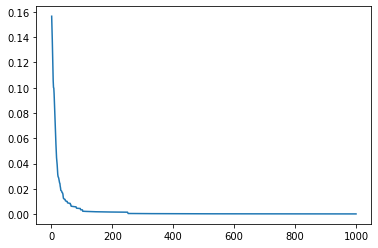

In [ ]:
plt.plot(epoch,Error)

In [ ]:
val=classifier(W1,W2,b1,b2,data_validation)

<ipython-input-21-b587db992c2e>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-v)))


In [ ]:
gt_v=gt_v.flatten()


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(gt_v, val)

In [ ]:
print(cm)

[[100   0   0]
 [  0 100   0]
 [  0   0 100]]


In [ ]:
accuracy=((cm[0,0]+cm[1,1]+cm[2,2])/(len(val)))*100
print("Accuracy:{} %".format(accuracy))

Accuracy:100.0 %


In [ ]:
data_class1_validation=data_class1_validation.T
data_class2_validation=data_class2_validation.T
data_class3_validation=data_class3_validation.T
print(data_class1_validation.shape)

(100, 2)


In [ ]:
x_arr = np.linspace(np.min(data_validation.T[:, 0]), np.max(data_validation.T[:, 0]), 1000)
y_arr = np.linspace(np.min(data_validation.T[:, 1]), np.max(data_validation.T[:, 1]), 1000)
xx, yy = np.meshgrid(x_arr, y_arr)
region = np.concatenate((xx.reshape((-1,1)), yy.reshape((-1,1))), axis=1)
mf = region


In [ ]:
z=classifier(W1,W2,b1,b2,mf.T)
z=np.array(z)
z = z.reshape(xx.shape)

<ipython-input-21-b587db992c2e>:2: RuntimeWarning: overflow encountered in exp
  return(1/(1+np.exp(-v)))


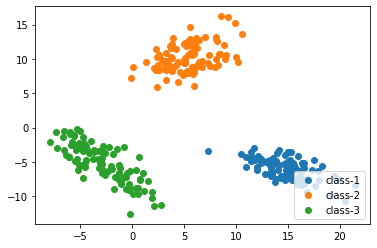

In [ ]:
plt.scatter(data_class1_validation[:, 0],data_class1_validation[:, 1],label="class-1",)
plt.scatter(data_class2_validation[:, 0],data_class2_validation[:, 1],label="class-2",)
plt.scatter(data_class3_validation[:, 0],data_class3_validation[:, 1],label="class-3",)
plt.legend(loc ="lower right")

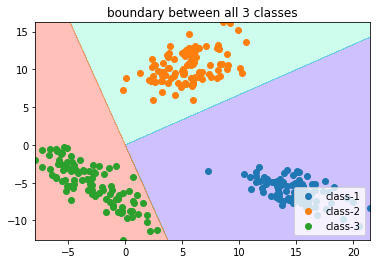

In [ ]:
plt.title("boundary between all 3 classes")
plt.contourf(xx, yy, z, alpha=0.3, cmap="rainbow")
plt.scatter(data_class1_validation[:, 0],data_class1_validation[:, 1],label="class-1",)
plt.scatter(data_class2_validation[:, 0],data_class2_validation[:, 1],label="class-2",)
plt.scatter(data_class3_validation[:, 0],data_class3_validation[:, 1],label="class-3",)
plt.legend(loc ="lower right")
#plt.scatter(data_class3_validation[:, 0],data_class3_validation[:, 1],label="class-1",)